In [ ]:
import pandas as pd

train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_problem_data.csv', thousands = ',')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_quality_data.csv', thousands = ',')
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_err_data.csv', thousands = ',')

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
display(train_err.head())
train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000

user_id            time model_nm       fwver  errtype errcode
0    10000  20201101025616  model_3  05.15.2138       15       1
1    10000  20201101030309  model_3  05.15.2138       12       1
2    10000  20201101030309  model_3  05.15.2138       11       1
3    10000  20201101050514  model_3  05.15.2138       16       1
4    10000  20201101050515  model_3  05.15.2138        4       0

In [ ]:
import numpy as np

print(np.sort(train_err.errtype.unique()))
# errtype이 1부터 42까지 29를 제외한 41개가 존재.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
# user_id와 errtype만을 사용하여 데이터 셋 생성
# 모든 일자에 대해서 errtype별 발생 건수를 count
# pandas의 groupby를 활용할 경우 큰 연산 자원이 필요.
# numpy로 placeholder를 만들어 구현함.
from tqdm import tqdm

id_error = train_err[['user_id','errtype']].values
error = np.zeros((train_user_number,42))

for person_idx, err in tqdm(id_error):
    # person_idx - train_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - train_user_id_min,err - 1] += 1
error.shape

100%|██████████| 16554663/16554663 [01:04<00:00, 254746.57it/s]


(15000, 42)

In [ ]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [ ]:
X = error
y = problem
del error, problem
print(X.shape)
print(y.shape)

(15000, 42)
(15000,)


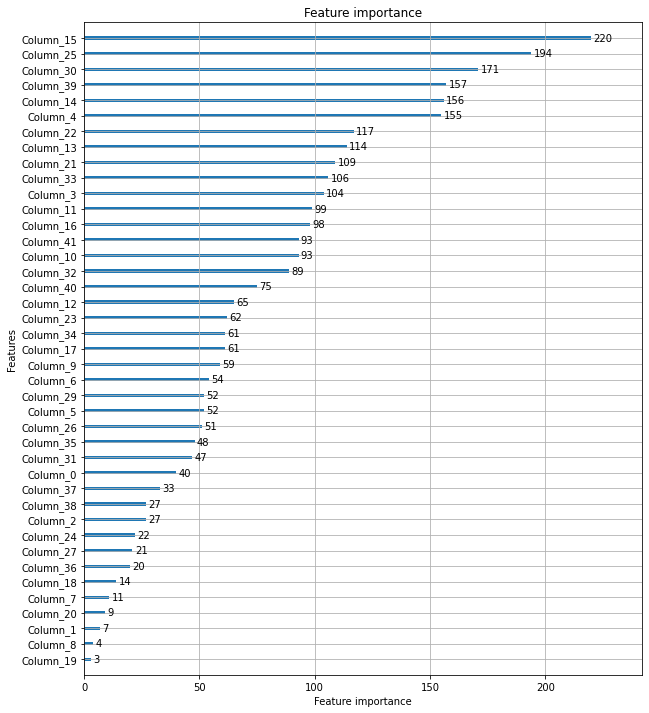

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

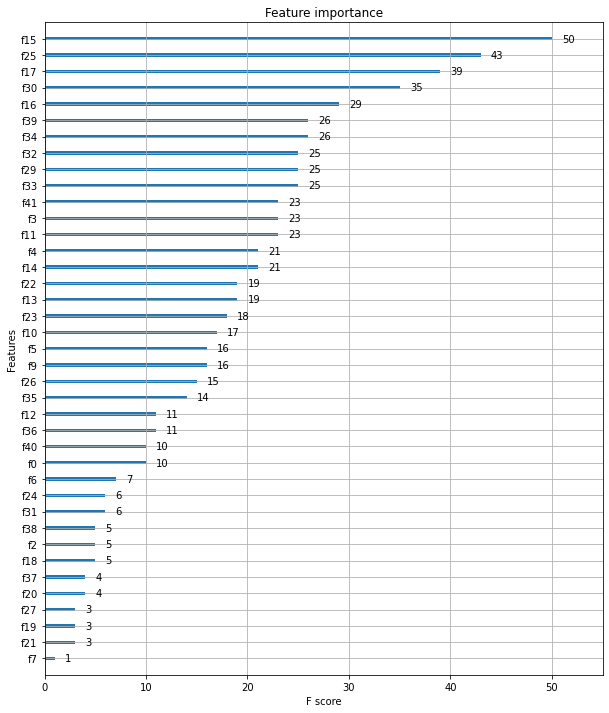

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

In [ ]:
import numpy as np

len(np.sort(train_err.fwver.unique()))

37

In [ ]:
items = train_err.fwver.unique()
items

array([5152138, 4331185, 4331261, 4221750, 4221778, 4163553, 4331149,
       4163571, 5663237, 5663571, 3111149, 4221684, 3111167, 4821684,
       4821778, 4331171, 4732237,      10, 4821730, 4732571,     853,
       4221666, 3111141, 5152120, 4331125, 4163439, 4221442, 4331095,
       4163569, 5152090, 5153104, 5152122, 4221656, 4162641, 5152114,
       4163345, 5152092])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(train_err.fwver)
labels.shape
train_err['fwver_label'] = labels

In [ ]:
sorted(train_err.fwver_label.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [ ]:
id_fwver = train_err[['user_id','fwver_label']].values
fwver = np.zeros((train_user_number,37))

for person_idx, fw in tqdm(id_fwver):
    # person_idx - train_user_id_min 위치에 person_idx, fwver에 해당하는 error값을 +1
    fwver[person_idx - train_user_id_min,fw] += 1
fwver.shape

100%|██████████| 16554663/16554663 [00:59<00:00, 280209.82it/s]


(15000, 37)

In [ ]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [ ]:
X = fwver
y = problem
del fwver, problem
print(X.shape)
print(y.shape)

(15000, 37)
(15000,)


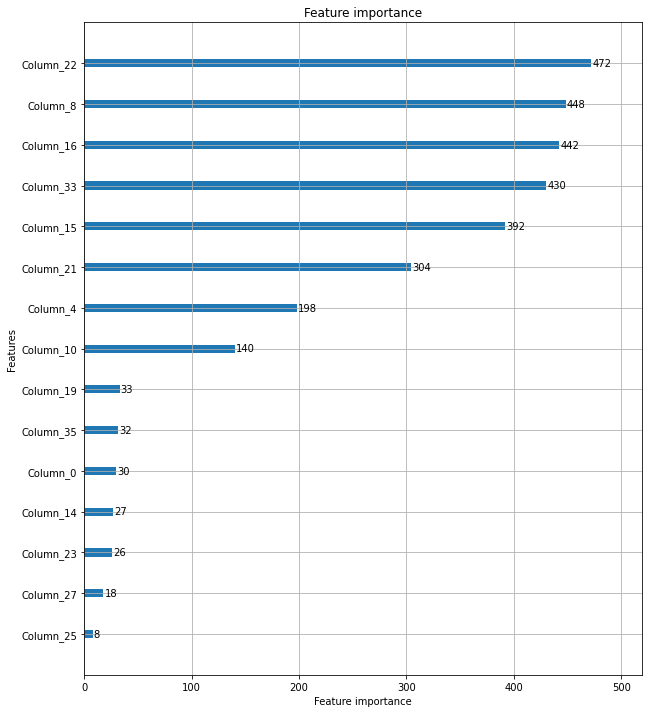

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

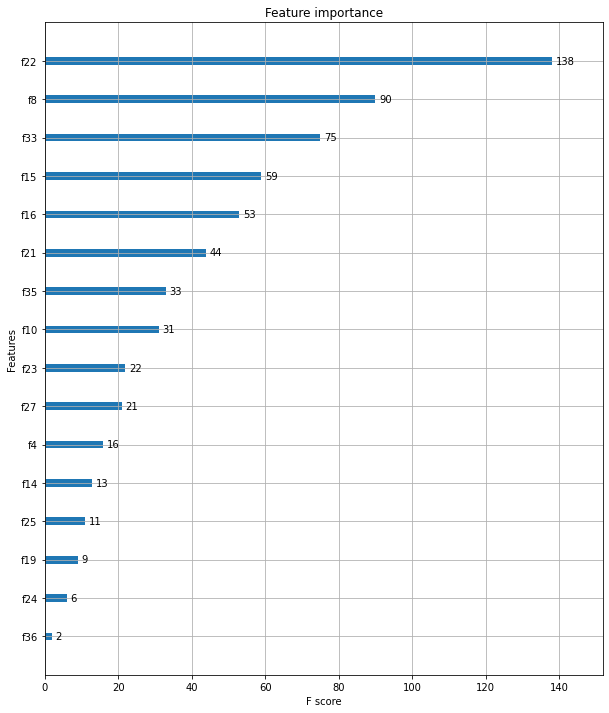

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

In [ ]:
import numpy as np

len(np.sort(train_err.model_nm.unique()))

9

In [ ]:
train_err['model_nm'] = train_err['model_nm'].str.split('_').str[1].astype('int64')
train_err

user_id            time  model_nm  ...  errtype  errcode fwver_label
0           10000  20201101025616         3  ...       15        1          33
1           10000  20201101030309         3  ...       12        1          33
2           10000  20201101030309         3  ...       11        1          33
3           10000  20201101050514         3  ...       16        1          33
4           10000  20201101050515         3  ...        4        0          33
...           ...             ...       ...  ...      ...      ...         ...
16554658    24999  20201130163051         3  ...       15        1          33
16554659    24999  20201130172625         3  ...       16        1          33
16554660    24999  20201130172625         3  ...        4        0          33
16554661    24999  20201130172631         3  ...        4        0          33
16554662    24999  20201130210625         3  ...       15        1          33

[16554663 rows x 7 columns]

In [ ]:
id_model = train_err[['user_id','model_nm']].values
model_nm = np.zeros((train_user_number,9))

for person_idx, mod in tqdm(id_model):
    # person_idx - train_user_id_min 위치에 person_idx, fwver에 해당하는 error값을 +1
    model_nm[person_idx - train_user_id_min,mod] += 1
model_nm.shape

100%|██████████| 16554663/16554663 [01:00<00:00, 273135.72it/s]


(15000, 9)

In [ ]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [ ]:
X = model_nm
y = problem
del model_nm, problem
print(X.shape)
print(y.shape)

(15000, 9)
(15000,)


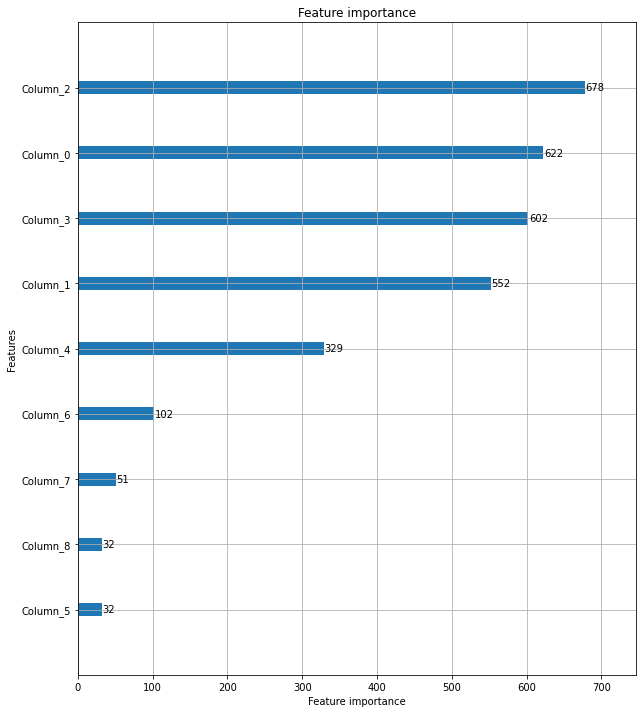

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

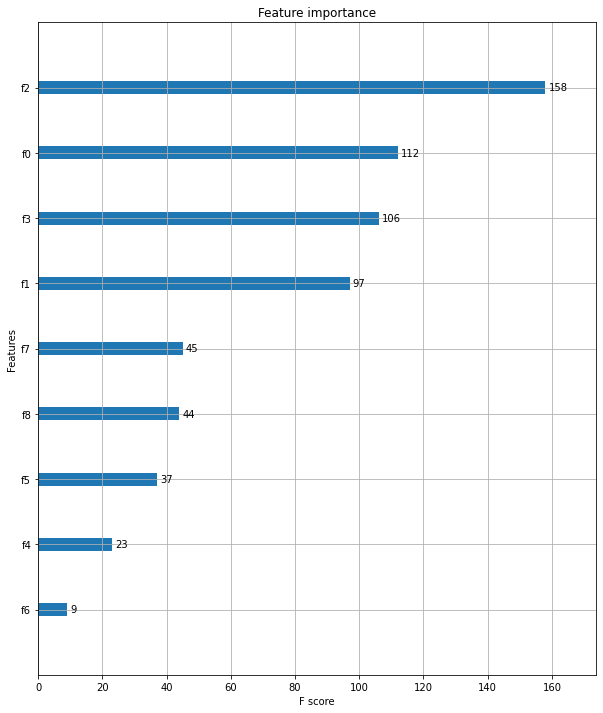

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)